<a href="https://colab.research.google.com/github/OWL-408/CIT2024/blob/main/%E4%B8%80%E6%A7%98%E4%BC%B8%E3%81%B3UEL%E7%AE%97%E5%87%BA%EF%BC%9A%E8%BF%91%E4%BC%BC%E7%9B%B4%E7%B7%9A%E3%81%AETS%E3%81%BE%E3%81%A7%E3%81%AE%E5%B9%B3%E8%A1%8C%E7%A7%BB%E5%8B%95%E3%82%92%E5%88%A9%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import glob
import os
from scipy.signal import savgol_filter
from numpy.linalg import LinAlgError

def smooth_data(x, y, window=15, poly=3):
    """ 応力データのスムージング処理 """
    y_smooth = savgol_filter(y, window_length=window, polyorder=poly, mode='interp')
    return y_smooth

def find_elastic_region(strain, stress):
    """ 微分を用いた線形領域の検出 """
    stress_smooth = smooth_data(strain, stress)

    d1 = np.gradient(stress_smooth, strain)  # 1階微分
    d2 = np.gradient(d1, strain)  # 2階微分

    threshold = np.percentile(d2, 90)  # 2階微分の大きい部分を閾値に
    linear_region = np.where(d2 < threshold)[0]  # しきい値以下の範囲を取得

    if len(linear_region) == 0:
        return None  # 線形領域が見つからない場合

    return linear_region[0]  # 最初の線形領域の開始点

def compute_uniform_strain(strain, stress):
    """ 一様ひずみ (uEl) の計算 """
    try:
        linear_start = find_elastic_region(strain, stress)
        if linear_start is None:
            return None, None

        strain_linear = strain[:linear_start]
        stress_linear = stress[:linear_start]

        A = np.vstack([strain_linear, np.ones(len(strain_linear))]).T
        coef, _, _, _ = np.linalg.lstsq(A, stress_linear, rcond=None)  # 線形回帰
        a, b = coef

        TS_idx = np.argmax(stress)  # TS のインデックス
        strain_TS, stress_TS = strain[TS_idx], stress[TS_idx]

        b_prime = stress_TS - a * strain_TS  # 平行移動後の切片
        uEl = -b_prime / a  # σ = 0 のときの ε

        return np.max(stress), uEl
    except LinAlgError:
        return None, None

def batch_process(folder_path, output_file):
    """ フォルダ内のすべてのCSVを処理し、結果を保存 """
    results = []
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    for file in csv_files:
        try:
            data = pd.read_csv(file)
            strain, stress = data.iloc[:, 0].values, data.iloc[:, 1].values
            TS, uEl = compute_uniform_strain(strain, stress)

            if TS is not None and uEl is not None:
                results.append([os.path.basename(file), TS, uEl])
        except Exception as e:
            print(f"Error processing {file}: {e}")

    df_results = pd.DataFrame(results, columns=['File Name', 'TS', 'uEl'])
    df_results.to_csv(output_file, index=False)

# 実行
folder_path = "/content/drive/MyDrive/σε/input-data"  # データフォルダ
output_file = "/content/drive/MyDrive/σε/output.csv"  # 出力先
batch_process(folder_path, output_file)


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/fun

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/fun

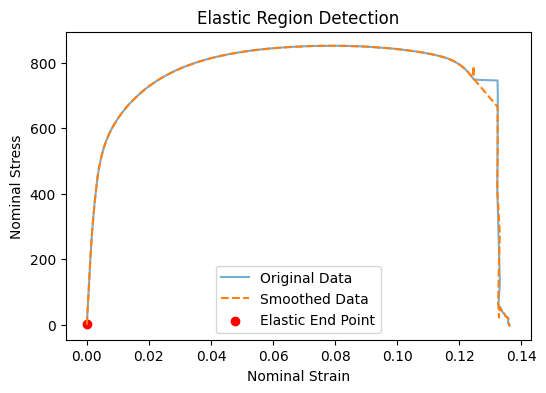

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/fun

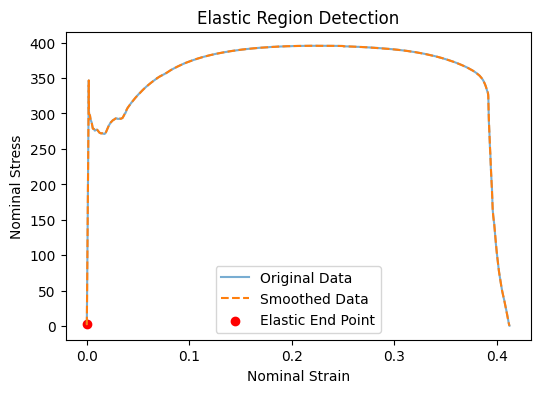

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1259: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


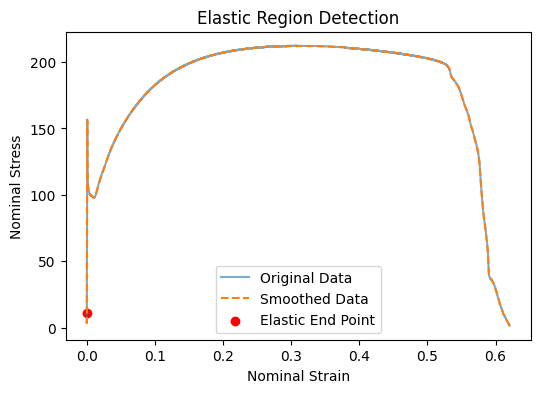

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]

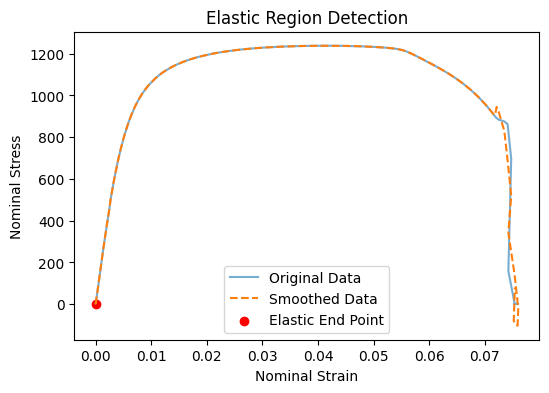

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def find_elastic_region(strain, stress, window_length=11, polyorder=3, threshold=0.02):
    """ 応力ひずみ曲線の微分をスムージングし、線形領域の終点を特定 """
    if len(strain) < window_length:
        print("データ点が少なすぎるため、スムージングをスキップ")
        return None

    smoothed_stress = savgol_filter(stress, window_length, polyorder)
    derivative = np.gradient(smoothed_stress, strain)

    # 微分の変化が大きい最初の点を線形範囲の終点とする
    diff_threshold = np.abs(np.gradient(derivative)) > threshold
    transition_idx = np.where(diff_threshold)[0]

    if len(transition_idx) == 0:
        print("線形範囲の終点が見つからない")
        return None

    elastic_end_idx = transition_idx[0]

    # デバッグ用プロット
    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)
    plt.plot(strain, smoothed_stress, label="Smoothed Data", linestyle="dashed")
    plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")
    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region Detection")
    plt.show()

    return elastic_end_idx

def compute_uniform_strain(strain, stress):
    """ 一様ひずみ (uEl) を計算 """
    elastic_end_idx = find_elastic_region(strain, stress)

    if elastic_end_idx is None:
        return None, None  # エラー処理

    # 線形領域のデータ取得
    linear_strain = strain[:elastic_end_idx + 1]
    linear_stress = stress[:elastic_end_idx + 1]

    # 線形回帰（最小二乗法）
    A = np.vstack([linear_strain, np.ones(len(linear_strain))]).T
    a, b = np.linalg.lstsq(A, linear_stress, rcond=None)[0]

    # 最大応力 (TS) の取得
    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    # 平行移動後の直線の切片
    b_shifted = TS - a * eps_TS

    # uEl の計算
    uEl = -b_shifted / a

    return TS, uEl

def process_csv(file_path):
    """ CSV ファイルを読み込み、TS と uEl を計算 """
    df = pd.read_csv(file_path)

    # データ列の取得
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 10:  # データ不足チェック
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl = compute_uniform_strain(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    return os.path.basename(file_path), TS, uEl

def batch_process(folder_path, output_file):
    """ フォルダ内のすべての CSV を処理し、新しい CSV に出力 """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    # 結果を DataFrame にまとめる
    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process(folder_path, output_file)


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def find_elastic_region(strain, stress, window_length=11, polyorder=3, threshold=0.02):
    """ 応力ひずみ曲線の微分をスムージングし、線形領域の終点を特定 """
    if len(strain) < window_length:
        print("データ点が少なすぎるため、スムージングをスキップ")
        return None

    # strain の変化量がゼロの箇所があるかチェック
    if np.any(np.diff(strain) == 0):
        print("strain の値に変化がない部分があり、微分計算が不安定になる可能性")
        return None

    smoothed_stress = savgol_filter(stress, window_length, polyorder)
    derivative = np.gradient(smoothed_stress, strain)

    # 微分の変化が安定している範囲を探索
    diff_change = np.abs(np.gradient(derivative))
    stable_region = diff_change < threshold  # 変化が小さい範囲

    # 最初に安定する範囲を見つける
    for i in range(5, len(stable_region) - 5):  # 最初の5点は除外
        if stable_region[i] and not stable_region[i - 1]:
            elastic_end_idx = i
            break
    else:
        print("線形範囲の終点が見つからない")
        return None

    return elastic_end_idx

def compute_uniform_strain(strain, stress):
    """ 一様ひずみ (uEl) を計算 """
    elastic_end_idx = find_elastic_region(strain, stress)

    if elastic_end_idx is None:
        return None, None, None, None  # エラー処理

    # 線形領域のデータ取得
    linear_strain = strain[:elastic_end_idx + 1]
    linear_stress = stress[:elastic_end_idx + 1]

    # 線形回帰（最小二乗法）
    A = np.vstack([linear_strain, np.ones(len(linear_strain))]).T
    a, b = np.linalg.lstsq(A, linear_stress, rcond=None)[0]

    # 最大応力 (TS) の取得
    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    # 平行移動後の直線の切片
    b_shifted = TS - a * eps_TS

    # uEl の計算
    uEl = -b_shifted / a

    return TS, uEl, elastic_end_idx, max_idx

def process_csv(file_path):
    """ CSV ファイルを読み込み、TS と uEl を計算 """
    df = pd.read_csv(file_path)

    # データ列の取得
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 10:  # データ不足チェック
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    # **可視化**
    smoothed_stress = savgol_filter(stress, 11, 3)

    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)
    plt.plot(strain, smoothed_stress, label="Smoothed Data", linestyle="dashed")

    # Elastic End Point (修正後)
    if elastic_end_idx is not None:
        plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")

    # TS の位置をプロット
    plt.scatter(strain[max_idx], stress[max_idx], color="green", marker="^", label="TS (Max Stress)")
    plt.annotate(f"TS: {TS:.2f}", (strain[max_idx], stress[max_idx]),
                 textcoords="offset points", xytext=(-30,10), ha='center', fontsize=10, color="green")

    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region and TS Detection")
    plt.show()

    return os.path.basename(file_path), TS, uEl

def batch_process(folder_path, output_file):
    """ フォルダ内のすべての CSV を処理し、新しい CSV に出力 """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    # 結果を DataFrame にまとめる
    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process(folder_path, output_file)



strain の値に変化がない部分があり、微分計算が不安定になる可能性
TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/B.csv
strain の値に変化がない部分があり、微分計算が不安定になる可能性
TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/F-P.csv
strain の値に変化がない部分があり、微分計算が不安定になる可能性
TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/F.csv
strain の値に変化がない部分があり、微分計算が不安定になる可能性
TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/M.csv


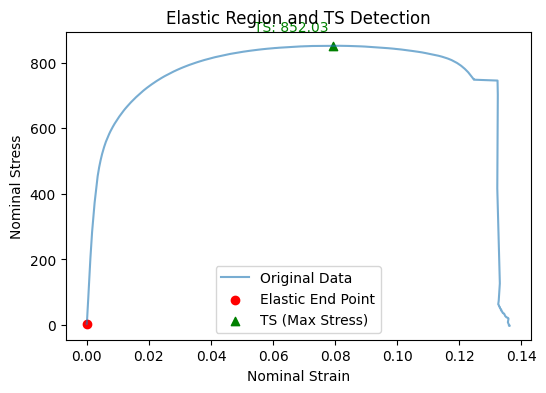

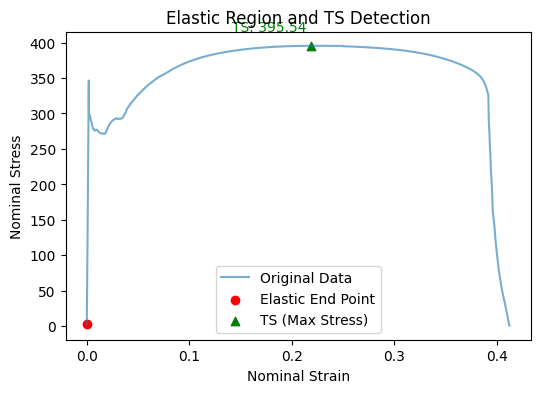

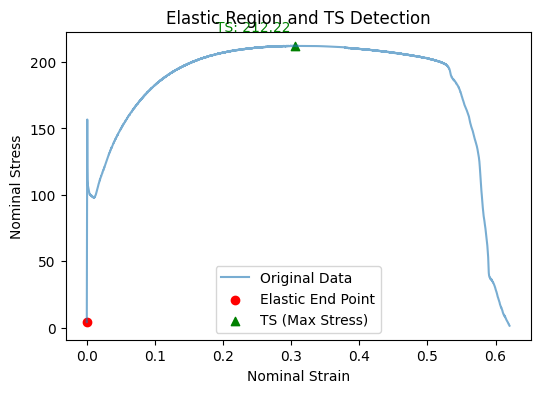

<ipython-input-9-56d20b87d5ec>:56: RuntimeWarning: divide by zero encountered in scalar divide
  uEl = -b_shifted / a


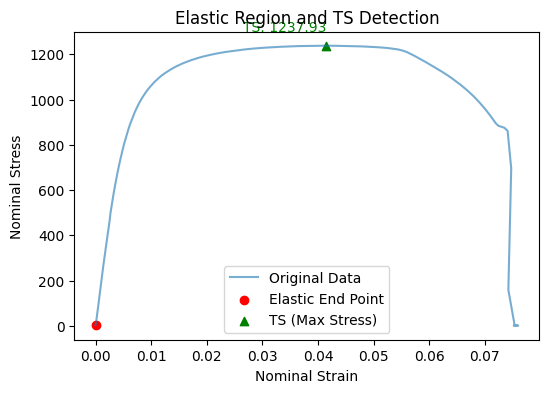

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def find_elastic_region_v2(strain, stress, r2_threshold=0.99):
    """ 線形回帰を繰り返しながら、線形範囲の終点を特定する """
    n = len(strain)

    if n < 10:
        print("データ点が少なすぎるため、線形回帰不可")
        return None

    for i in range(5, n - 5):  # 最初の5点は除外
        x = strain[:i].reshape(-1, 1)
        y = stress[:i]

        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)

        r2 = model.score(x, y)  # 決定係数 R^2 を計算

        if r2 < r2_threshold:  # ある閾値を下回ったら線形範囲の終点
            return i - 1  # 直前の点を終点とする

    return None  # 終点が見つからない場合

def compute_uniform_strain_v2(strain, stress):
    """ 一様ひずみ (uEl) を計算 """
    elastic_end_idx = find_elastic_region_v2(strain, stress)

    if elastic_end_idx is None:
        return None, None, None, None  # エラー処理

    # 線形範囲のデータ取得
    linear_strain = strain[:elastic_end_idx + 1].reshape(-1, 1)
    linear_stress = stress[:elastic_end_idx + 1]

    # 線形回帰
    model = LinearRegression()
    model.fit(linear_strain, linear_stress)
    a = model.coef_[0]  # 傾き
    b = model.intercept_  # 切片

    # 最大応力 (TS) の取得
    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    # 平行移動後の直線の切片
    b_shifted = TS - a * eps_TS

    # uEl の計算
    uEl = -b_shifted / a

    return TS, uEl, elastic_end_idx, max_idx

def process_csv_v2(file_path):
    """ CSV ファイルを処理し、TS と uEl を計算 """
    df = pd.read_csv(file_path)

    # データ列の取得
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 10:  # データ不足チェック
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain_v2(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    # **可視化**
    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)

    # Elastic End Point (修正後)
    if elastic_end_idx is not None:
        plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")

    # TS の位置をプロット
    plt.scatter(strain[max_idx], stress[max_idx], color="green", marker="^", label="TS (Max Stress)")
    plt.annotate(f"TS: {TS:.2f}", (strain[max_idx], stress[max_idx]),
                 textcoords="offset points", xytext=(-30,10), ha='center', fontsize=10, color="green")

    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region and TS Detection")
    plt.show()

    return os.path.basename(file_path), TS, uEl

def batch_process_v2(folder_path, output_file):
    """ フォルダ内のすべての CSV を処理し、新しい CSV に出力 """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv_v2(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    # 結果を DataFrame にまとめる
    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process_v2(folder_path, output_file)


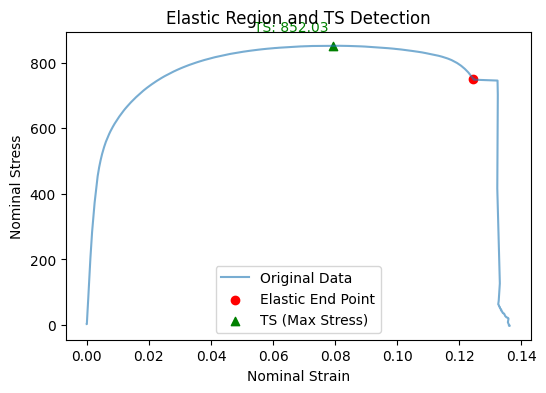

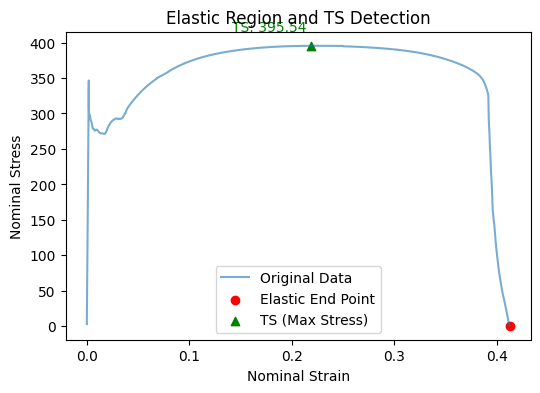

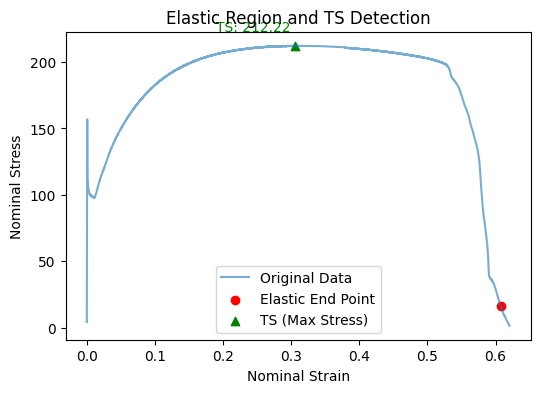

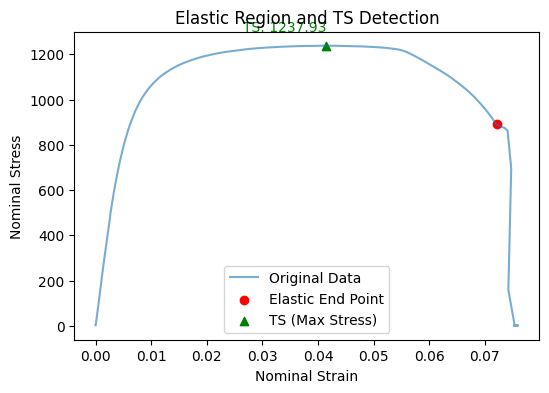

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def find_elastic_region_v6(strain, stress, min_r2=0.995, min_linear_range=0.005):
    """ 短い線形区間にも対応し、局所的な回帰分析で線形領域を特定 """
    n = len(strain)

    if n < 3:
        print("データ点が少なすぎるため、線形回帰不可")
        return None

    window_size = min(5, n - 1)  # 小さいデータの場合は適応
    best_r2 = 0
    best_idx = None

    for i in range(2, n - window_size):
        x = strain[i:i + window_size].reshape(-1, 1)
        y = stress[i:i + window_size]

        if np.all(np.diff(x.flatten()) == 0):
            continue  # strain が一定ならスキップ

        model = LinearRegression()
        model.fit(x, y)
        r2 = model.score(x, y)

        if r2 > min_r2:
            best_r2 = r2
            best_idx = i + window_size - 1  # 直線区間の終点

            # 最小線形区間長を満たしているかチェック
            if strain[best_idx] - strain[i] >= min_linear_range:
                return best_idx

    return best_idx if best_idx is not None else None

def compute_uniform_strain_v6(strain, stress):
    """ 一様ひずみ (uEl) を計算 """
    elastic_end_idx = find_elastic_region_v6(strain, stress)

    if elastic_end_idx is None:
        return None, None, None, None  # エラー処理

    linear_strain = strain[:elastic_end_idx + 1].reshape(-1, 1)
    linear_stress = stress[:elastic_end_idx + 1]

    if np.all(np.diff(linear_strain.flatten()) == 0):
        print("strain の値が一定で、線形回帰ができない")
        return None, None, None, None

    model = LinearRegression()
    model.fit(linear_strain, linear_stress)
    a = model.coef_[0]  # 傾き
    b = model.intercept_

    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    b_shifted = TS - a * eps_TS
    uEl = -b_shifted / a

    return TS, uEl, elastic_end_idx, max_idx

def process_csv_v6(file_path):
    """ CSV ファイルを処理し、TS と uEl を計算 """
    df = pd.read_csv(file_path)

    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 3:  # 最低3点以上必要
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain_v6(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    # **可視化**
    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)

    if elastic_end_idx is not None:
        plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")

    plt.scatter(strain[max_idx], stress[max_idx], color="green", marker="^", label="TS (Max Stress)")
    plt.annotate(f"TS: {TS:.2f}", (strain[max_idx], stress[max_idx]),
                 textcoords="offset points", xytext=(-30,10), ha='center', fontsize=10, color="green")

    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region and TS Detection")
    plt.show()

    return os.path.basename(file_path), TS, uEl

def batch_process_v6(folder_path, output_file):
    """ フォルダ内のすべての CSV を処理し、新しい CSV に出力 """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv_v6(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process_v6(folder_path, output_file)




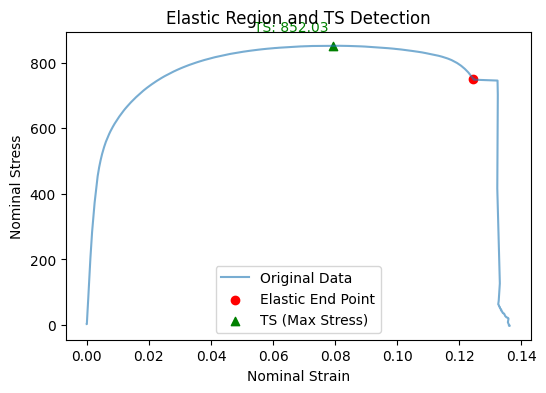

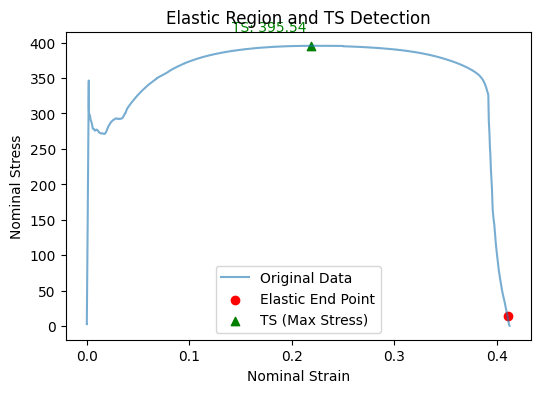

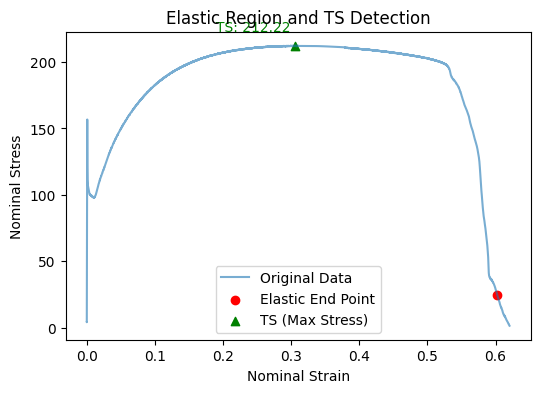

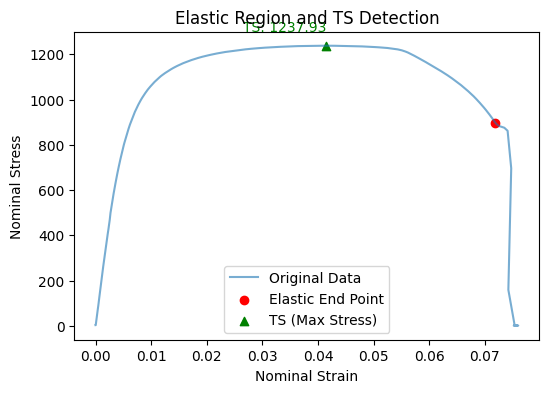

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def find_elastic_region_v8(strain, stress, min_r2=0.999, min_linear_range=0.005):
    """ 局所的な曲率の変化も考慮して線形領域を特定 """
    n = len(strain)

    if n < 5:  # データ点が少なすぎる場合は処理不可
        print("データ点が少なすぎるため、線形回帰不可")
        return None

    window_size = min(5, n - 1)  # 小さいデータに対応
    best_r2 = 0
    best_idx = None
    curvature_threshold = 0.5  # しきい値（調整可）

    # **曲率（2階微分）を計算**
    strain_diff = np.gradient(strain)
    stress_diff = np.gradient(stress)
    curvature = np.gradient(stress_diff) / (1 + stress_diff**2) ** 1.5  # 曲率公式

    for i in range(2, n - window_size):
        x = strain[i:i + window_size].reshape(-1, 1)
        y = stress[i:i + window_size]

        if np.all(np.diff(x.flatten()) == 0):
            continue  # strain が一定ならスキップ

        model = LinearRegression()
        model.fit(x, y)
        r2 = model.score(x, y)

        # **曲率の変化を考慮**
        if r2 > min_r2 and np.abs(curvature[i]) < curvature_threshold:
            best_r2 = r2
            best_idx = i + window_size - 1  # 直線区間の終点候補

    return best_idx if best_idx is not None else None

def compute_uniform_strain_v8(strain, stress):
    """ 一様ひずみ (uEl) を計算 """
    elastic_end_idx = find_elastic_region_v8(strain, stress)

    if elastic_end_idx is None:
        return None, None, None, None  # エラー処理

    linear_strain = strain[:elastic_end_idx + 1].reshape(-1, 1)
    linear_stress = stress[:elastic_end_idx + 1]

    if np.all(np.diff(linear_strain.flatten()) == 0):
        print("strain の値が一定で、線形回帰ができない")
        return None, None, None, None

    model = LinearRegression()
    model.fit(linear_strain, linear_stress)
    a = model.coef_[0]  # 傾き
    b = model.intercept_

    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    b_shifted = TS - a * eps_TS
    uEl = -b_shifted / a

    return TS, uEl, elastic_end_idx, max_idx

def process_csv_v8(file_path):
    """ CSV ファイルを処理し、TS と uEl を計算 """
    df = pd.read_csv(file_path)

    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 5:  # 最低5点以上必要
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain_v8(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    # **可視化**
    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)

    if elastic_end_idx is not None:
        plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")

    plt.scatter(strain[max_idx], stress[max_idx], color="green", marker="^", label="TS (Max Stress)")
    plt.annotate(f"TS: {TS:.2f}", (strain[max_idx], stress[max_idx]),
                 textcoords="offset points", xytext=(-30,10), ha='center', fontsize=10, color="green")

    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region and TS Detection")
    plt.show()

    return os.path.basename(file_path), TS, uEl

def batch_process_v8(folder_path, output_file):
    """ フォルダ内のすべての CSV を処理し、新しい CSV に出力 """
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv_v8(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process_v8(folder_path, output_file)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

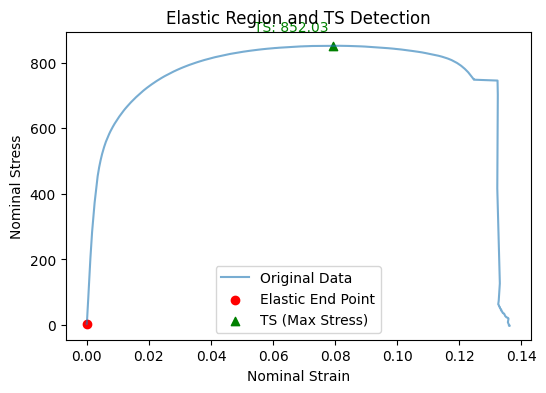

strain の値が一定で、線形回帰ができない
TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/F-P.csv
TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/F.csv


<ipython-input-4-aeb9a1842523>:57: RuntimeWarning: divide by zero encountered in scalar divide
  uEl = -b_shifted / a


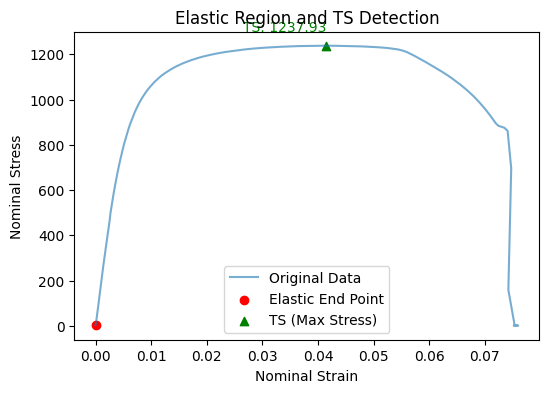

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def find_elastic_region_by_regression(strain, stress, min_r2=0.999):
    """線形回帰を繰り返し適用しながら、最適な線形領域を特定"""
    n = len(strain)
    if n < 5:
        print("データ点が少なすぎるため、線形回帰不可")
        return None

    best_idx = 1  # 最小でも2点必要なので1から開始
    best_r2 = 0

    for i in range(2, n):
        x = strain[:i].reshape(-1, 1)
        y = stress[:i]

        model = LinearRegression()
        model.fit(x, y)
        r2 = model.score(x, y)

        if r2 < min_r2:
            break  # 線形近似の精度が下がったら終了

        best_idx = i
        best_r2 = r2

    return best_idx if best_r2 > 0 else None

def compute_uniform_strain_v10(strain, stress):
    """一様ひずみ (uEl) を回帰分析ベースで計算"""
    elastic_end_idx = find_elastic_region_by_regression(strain, stress)

    if elastic_end_idx is None:
        return None, None, None, None

    linear_strain = strain[:elastic_end_idx].reshape(-1, 1)
    linear_stress = stress[:elastic_end_idx]

    if np.all(np.diff(linear_strain.flatten()) == 0):
        print("strain の値が一定で、線形回帰ができない")
        return None, None, None, None

    model = LinearRegression()
    model.fit(linear_strain, linear_stress)
    a = model.coef_[0]
    b = model.intercept_

    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    b_shifted = TS - a * eps_TS
    uEl = -b_shifted / a

    return TS, uEl, elastic_end_idx, max_idx

def process_csv_v10(file_path):
    """CSVファイルを処理し、TS と uEl を計算"""
    df = pd.read_csv(file_path)
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 5:
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain_v10(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    # 可視化
    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)

    if elastic_end_idx is not None:
        plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")

    plt.scatter(strain[max_idx], stress[max_idx], color="green", marker="^", label="TS (Max Stress)")
    plt.annotate(f"TS: {TS:.2f}", (strain[max_idx], stress[max_idx]),
                 textcoords="offset points", xytext=(-30,10), ha='center', fontsize=10, color="green")

    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region and TS Detection")
    plt.show()

    return os.path.basename(file_path), TS, uEl

def batch_process_v10(folder_path, output_file):
    """フォルダ内のすべてのCSVを処理し、新しいCSVに出力"""
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv_v10(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process_v10(folder_path, output_file)



TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/B.csv


<ipython-input-5-378432ffba23>:64: RuntimeWarning: divide by zero encountered in scalar divide
  uEl = -b_shifted / a


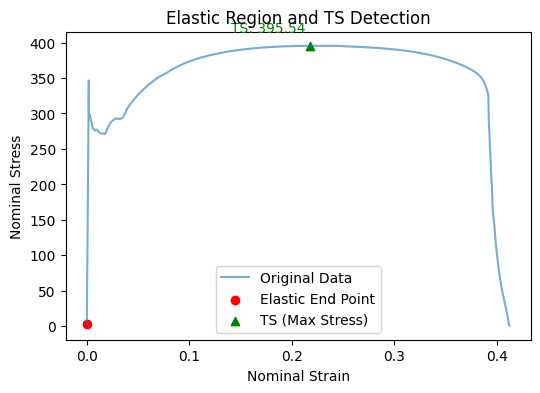

TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/F.csv


<ipython-input-5-378432ffba23>:64: RuntimeWarning: divide by zero encountered in scalar divide
  uEl = -b_shifted / a


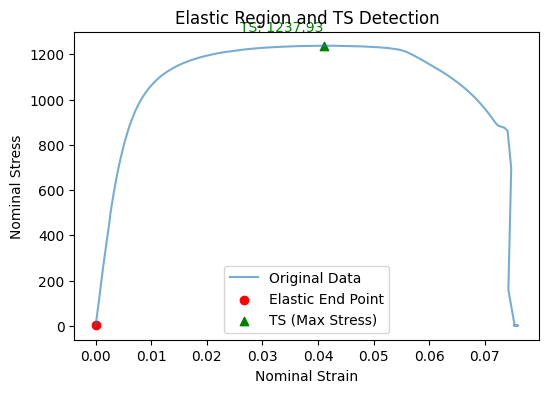

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def preprocess_strain_data(strain, stress):
    """strain の値が一定な部分を削除"""
    mask = np.insert(np.diff(strain) > 1e-6, 0, True)  # 変化がない部分を削除
    return strain[mask], stress[mask]

def find_elastic_region_by_regression(strain, stress, min_r2=0.99, min_points=5):
    """線形回帰で最適な線形領域を探索"""
    n = len(strain)
    if n < min_points:
        print("データ点が少なすぎるため、線形回帰不可")
        return None

    best_idx = min_points
    best_r2 = 0

    for i in range(min_points, n):
        x = strain[:i].reshape(-1, 1)
        y = stress[:i]

        model = LinearRegression()
        model.fit(x, y)
        r2 = model.score(x, y)

        if r2 < min_r2:
            break  # R² がしきい値を下回ったら終了

        best_idx = i
        best_r2 = r2

    return best_idx if best_r2 > 0 else None

def compute_uniform_strain_v11(strain, stress):
    """一様ひずみ (uEl) を回帰分析ベースで計算"""
    strain, stress = preprocess_strain_data(strain, stress)

    elastic_end_idx = find_elastic_region_by_regression(strain, stress)

    if elastic_end_idx is None:
        return None, None, None, None

    linear_strain = strain[:elastic_end_idx].reshape(-1, 1)
    linear_stress = stress[:elastic_end_idx]

    if len(linear_strain) < 2:
        print("線形回帰に必要な点数が足りない")
        return None, None, None, None

    model = LinearRegression()
    model.fit(linear_strain, linear_stress)
    a = model.coef_[0]
    b = model.intercept_

    max_idx = np.argmax(stress)
    TS = stress[max_idx]
    eps_TS = strain[max_idx]

    b_shifted = TS - a * eps_TS
    uEl = -b_shifted / a

    return TS, uEl, elastic_end_idx, max_idx

def process_csv_v11(file_path):
    """CSVファイルを処理し、TS と uEl を計算"""
    df = pd.read_csv(file_path)
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 5:
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain_v11(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    # 可視化
    plt.figure(figsize=(6, 4))
    plt.plot(strain, stress, label="Original Data", alpha=0.6)

    if elastic_end_idx is not None:
        plt.scatter(strain[elastic_end_idx], stress[elastic_end_idx], color="red", label="Elastic End Point")

    plt.scatter(strain[max_idx], stress[max_idx], color="green", marker="^", label="TS (Max Stress)")
    plt.annotate(f"TS: {TS:.2f}", (strain[max_idx], stress[max_idx]),
                 textcoords="offset points", xytext=(-30,10), ha='center', fontsize=10, color="green")

    plt.xlabel("Nominal Strain")
    plt.ylabel("Nominal Stress")
    plt.legend()
    plt.title("Elastic Region and TS Detection")
    plt.show()

    return os.path.basename(file_path), TS, uEl

def batch_process_v11(folder_path, output_file):
    """フォルダ内のすべてのCSVを処理し、新しいCSVに出力"""
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv_v11(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process_v11(folder_path, output_file)


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def resample_strain(stress, strain, num_points=100):
    """終点を固定しつつ等間隔でリサンプリング"""
    new_strain = np.linspace(strain[0], strain[-1], num_points)
    interp_func = interp1d(strain, stress, kind='linear', fill_value='extrapolate')
    new_stress = interp_func(new_strain)
    return new_strain, new_stress

def compute_uniform_strain_v12(strain, stress):
    """一様伸び計算（修正版）"""
    try:
        TS_idx = np.argmax(stress)  # 最大応力点
        TS = stress[TS_idx]

        # 線形回帰で乖離点を特定（最適な方法はデータによる）
        for i in range(5, len(strain) - 5):
            subset_x = strain[:i].reshape(-1, 1)
            subset_y = stress[:i]

            # 線形回帰モデル
            coef = np.polyfit(subset_x.flatten(), subset_y, 1)
            pred_y = np.polyval(coef, subset_x)

            # 残差誤差の計算
            error = np.abs(subset_y - pred_y).sum()
            if error > 0.02 * np.abs(stress[i]):  # 閾値調整
                elastic_end_idx = i - 1
                break
        else:
            elastic_end_idx = None

        # 一様伸び計算
        if elastic_end_idx is not None:
            a, b = coef
            b_shifted = TS - a * strain[TS_idx]
            uEl = -b_shifted / a
        else:
            uEl = None

        return TS, uEl, elastic_end_idx, TS_idx
    except Exception as e:
        print(f"計算エラー: {e}")
        return None, None, None, None

def process_csv_v12(file_path):
    """CSV処理（リサンプリング適用）"""
    df = pd.read_csv(file_path)
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    if len(strain) < 5:
        print(f"データが少なすぎる: {file_path}")
        return None, None, None

    strain, stress = resample_strain(stress, strain)
    TS, uEl, elastic_end_idx, max_idx = compute_uniform_strain_v12(strain, stress)

    if TS is None or uEl is None:
        print(f"TS または uEl の計算に失敗: {file_path}")
        return None, None, None

    return os.path.basename(file_path), TS, uEl

def batch_process_v12(folder_path, output_file):
    """フォルダ内のCSVを一括処理"""
    results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv_v12(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

# フォルダパスと出力ファイルパスの設定
folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"

batch_process_v12(folder_path, output_file)



/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/B.csv


/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


TS または uEl の計算に失敗: /content/drive/MyDrive/σε/input-data/M.csv


In [ ]:
import os
import numpy as np
import pandas as pd
import scipy.interpolate as spi

def resample_strain(strain, stress, num_points=100):
    """ひずみを等間隔にリサンプリング（終点の大きさは維持）"""
    if len(strain) < 2:
        return None, None  # データ不足の場合は処理しない

    max_strain = strain[-1]  # 終点を維持
    new_strain = np.linspace(strain[0], max_strain, num_points)
    interp_func = spi.interp1d(strain, stress, kind='linear', fill_value="extrapolate")
    new_stress = interp_func(new_strain)

    return new_strain, new_stress

def compute_elastic_region(strain, stress):
    """線形回帰を用いて弾性範囲の終点を特定"""
    if len(strain) < 5:
        return None  # データが少なすぎる場合

    # 最初の 10-20% で回帰直線を試す（過剰適合を防ぐ）
    max_idx = len(strain) // 5
    for i in range(2, max_idx):
        slope, intercept = np.polyfit(strain[:i], stress[:i], 1)
        predicted = slope * strain[:i] + intercept
        residuals = np.abs(stress[:i] - predicted)
        if np.mean(residuals) > 0.02 * np.max(stress):  # しきい値で判定
            return i - 1
    return max_idx

def process_csv(file_path):
    """CSV を処理し、TS と uEl を計算"""
    df = pd.read_csv(file_path)
    strain = df.iloc[:, 0].values
    stress = df.iloc[:, 1].values

    # データが少なすぎる場合の処理
    if len(strain) < 5:
        print(f"データ不足: {file_path}")
        return None, None, None

    # リサンプリング
    strain, stress = resample_strain(strain, stress)
    if strain is None:
        print(f"リサンプリング失敗: {file_path}")
        return None, None, None

    # 最大応力点（TS）
    max_idx = np.argmax(stress)
    TS = stress[max_idx]

    # 弾性終点の特定
    elastic_end_idx = compute_elastic_region(strain, stress)
    if elastic_end_idx is None:
        print(f"弾性領域の特定失敗: {file_path}")
        return None, None, None

    # uEl の計算
    slope, intercept = np.polyfit(strain[:elastic_end_idx], stress[:elastic_end_idx], 1)
    b_shifted = TS - slope * strain[max_idx]
    if slope == 0:
        return None, None, None
    uEl = -b_shifted / slope

    return os.path.basename(file_path), TS, uEl

def batch_process(folder_path, output_file):
    """フォルダ内のすべての CSV を処理し、新しい CSV に出力"""
    results = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            file_name, TS, uEl = process_csv(file_path)
            if TS is not None and uEl is not None:
                results.append([file_name, TS, uEl])

    df_output = pd.DataFrame(results, columns=["File Name", "TS", "uEl"])
    df_output.to_csv(output_file, index=False)

# 実行
folder_path = "/content/drive/MyDrive/σε/input-data"
output_file = "/content/drive/MyDrive/σε/output.csv"
batch_process(folder_path, output_file)




/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
